In [7]:
#www.kaggle.com/competitions/playground-series-s4e11/overview/$citation

In [1]:
pip install xgboost

  Using cached xgboost-2.1.2-py3-none-win_amd64.whl.metadata (2.1 kB)
Using cached xgboost-2.1.2-py3-none-win_amd64.whl (124.9 MB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\lucas\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
pip install nbstripout

  Using cached nbstripout-0.8.0-py2.py3-none-any.whl.metadata (19 kB)
Using cached nbstripout-0.8.0-py2.py3-none-any.whl (16 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\lucas\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [5]:
#import packages

#EDA / Visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#data modeling
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint
from sklearn import tree
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier

#for github
import nbstripout

#for packaging model
import joblib

# EDA

In [8]:
#import training data and start exploratory data analysis
data = pd.read_csv('train.csv')

In [9]:
data.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [12]:
data.columns

Index(['id', 'Name', 'Gender', 'Age', 'City',
       'Working Professional or Student', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

In [13]:
data.count()

id                                       140700
Name                                     140700
Gender                                   140700
Age                                      140700
City                                     140700
Working Professional or Student          140700
Profession                               104070
Academic Pressure                         27897
Work Pressure                            112782
CGPA                                      27898
Study Satisfaction                        27897
Job Satisfaction                         112790
Sleep Duration                           140700
Dietary Habits                           140696
Degree                                   140698
Have you ever had suicidal thoughts ?    140700
Work/Study Hours                         140700
Financial Stress                         140696
Family History of Mental Illness         140700
Depression                               140700
dtype: int64

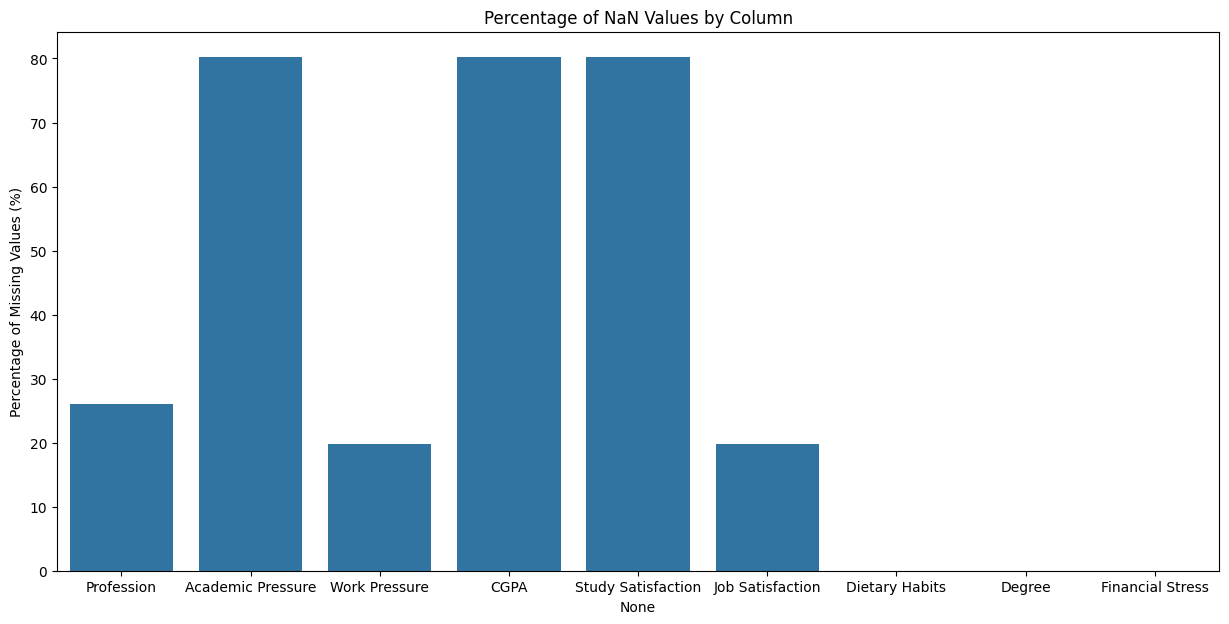

In [46]:
nan_cols = data.columns[data.isna().any()]
null_col_values_focus = data[nan_cols].isna().mean() * 100

plt.figure(figsize=(15, 7))
sns.barplot(x=null_col_values_focus.index, y=null_col_values_focus.values)
plt.ylabel('Percentage of Missing Values (%)')
plt.title('Percentage of NaN Values by Column')
plt.show()

In [19]:
data.isnull().sum()

id                                            0
Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                36630
Academic Pressure                        112803
Work Pressure                             27918
CGPA                                     112802
Study Satisfaction                       112803
Job Satisfaction                          27910
Sleep Duration                                0
Dietary Habits                                4
Degree                                        2
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              4
Family History of Mental Illness              0
Depression                                    0
dtype: int64

### Data Visulization

In [71]:
#number of depressed individuals and whether they are male or female and wether they are a working professional or are in schoool.

data_dep_vis = data[['Depression', 'Gender', 'Working Professional or Student']]

depressed_data = data_dep_vis[data_dep_vis['Depression'] == 1]


plt.figure(figsize=(10,6))
plt.bar(data=

Depression                         140700
Gender                             140700
Working Professional or Student    140700
dtype: int64


In [72]:
#age distribution of depressed individuals

data['Age'].describe()

count    140700.000000
mean         40.388621
std          12.384099
min          18.000000
25%          29.000000
50%          42.000000
75%          51.000000
max          60.000000
Name: Age, dtype: float64

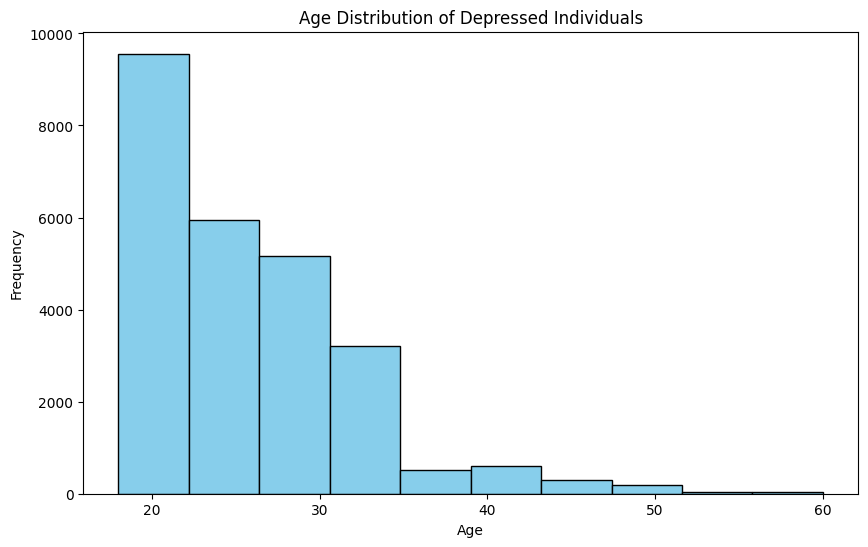

In [75]:
data_age_hist = data[data['Depression'] == 1]

plt.figure(figsize=(10, 6))
plt.hist(data_age_hist['Age'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age Distribution of Depressed Individuals")
plt.show()

In [76]:
#histogram of study / work hours for depressed individuals

data['Work/Study Hours'].describe()

count    140700.000000
mean          6.252679
std           3.853615
min           0.000000
25%           3.000000
50%           6.000000
75%          10.000000
max          12.000000
Name: Work/Study Hours, dtype: float64

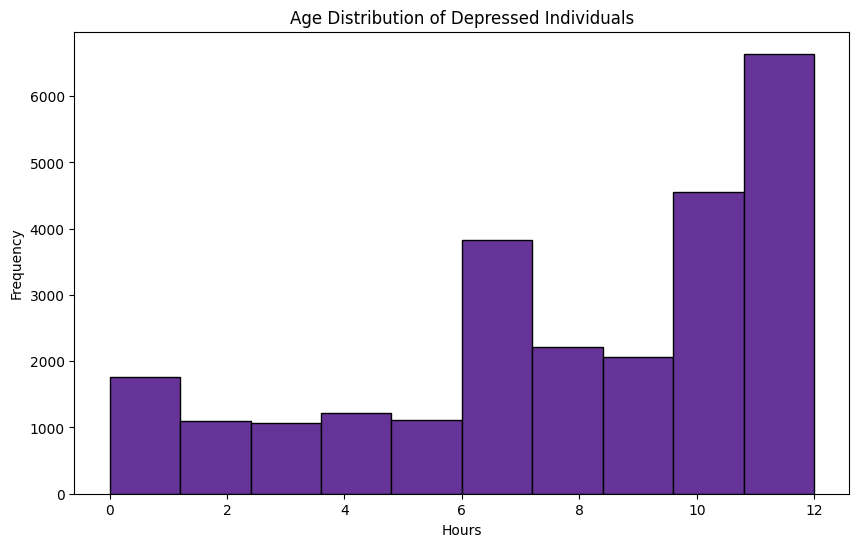

In [82]:
data_hours_hist = data[data['Depression'] == 1]

plt.figure(figsize=(10, 6))
plt.hist(data_hours_hist['Work/Study Hours'], bins=10, color='rebeccapurple', edgecolor='black')
plt.xlabel("Hours")
plt.ylabel("Frequency")
plt.title("Age Distribution of Depressed Individuals")
plt.show()

### Data Cleaning

In [20]:
#When working with predictive modeling, you cannot use null values. There are 3 different approaches we can take to mitigate these values.
#The first option would be to completely wipe out all rows that contain at least 1 null value. This should be a last resort approach as we want to be 
#able to use as much data as possible for the model. The second option would be to find the mean or median of the column (if numeric) and fill in
#the nulls with that average value. This option is best if you have a large percentage of null values, but can throw off other statistics and models.
#Lastly, similarly with the average value method, we can fill in the nulls randomly. Even character values could be randomized if there is a unique set
#of different values. Again, this is not ideal unless there is a large portion of data missing. 

#Below we will determine the best route. 

In [31]:
#profession unique values
data['Profession'].unique()

array(['Chef', 'Teacher', nan, 'Business Analyst', 'Finanancial Analyst',
       'Chemist', 'Electrician', 'Software Engineer', 'Data Scientist',
       'Plumber', 'Marketing Manager', 'Accountant', 'Entrepreneur',
       'HR Manager', 'UX/UI Designer', 'Content Writer',
       'Educational Consultant', 'Civil Engineer', 'Manager',
       'Pharmacist', 'Financial Analyst', 'Architect',
       'Mechanical Engineer', 'Customer Support', 'Consultant', 'Judge',
       'Researcher', 'Pilot', 'Graphic Designer', 'Travel Consultant',
       'Digital Marketer', 'Lawyer', 'Research Analyst',
       'Sales Executive', 'Doctor', 'Unemployed', 'Investment Banker',
       'Family Consultant', 'B.Com', 'BE', 'Student', 'Yogesh', 'Dev',
       'MBA', 'LLM', 'BCA', 'Academic', 'Profession', 'FamilyVirar',
       'City Manager', 'BBA', 'Medical Doctor', 'Working Professional',
       'MBBS', 'Patna', 'Unveil', 'B.Ed', 'Nagpur', 'Moderate', 'M.Ed',
       'Analyst', 'Pranav', 'Visakhapatnam', 'PhD', 'Yu

Based on the values here, we could easily fill in the 'nan' values with a random profession, but considering the context I plan to fill in the nan values with something like "unemployeed" or "no profession". 

In [25]:
#academic pressure unique values
data['Academic Pressure'].unique()

array([nan,  5.,  2.,  3.,  4.,  1.])

Looks like the academic pressure may be a great depressive indicator, but we do have some nan values. Considering the context I believe we can fill in the 'nan' values with 0 as this would mean an individual has no academic pressure. 

In [26]:
#work pressure unique values
data['Work Pressure'].unique()

array([ 5.,  4., nan,  1.,  2.,  3.])

Similary with the academic pressure, we should be able to replace those 'nan' values with 0.

In [28]:
#Cumulative Grade Point Average unique values
data['CGPA'].unique()

array([    nan,  8.97  ,  5.9   ,  7.03  ,  5.59  ,  8.13  ,  5.7   ,
        9.54  ,  8.04  ,  9.79  ,  8.38  ,  6.1   ,  7.04  ,  8.52  ,
        5.64  ,  8.58  ,  6.51  ,  7.25  ,  7.83  ,  9.93  ,  8.74  ,
        6.73  ,  5.57  ,  8.59  ,  7.1   ,  6.08  ,  5.74  ,  9.86  ,
        6.7   ,  6.21  ,  5.87  ,  6.37  ,  9.72  ,  5.88  ,  9.56  ,
        6.99  ,  5.24  ,  9.21  ,  7.85  ,  6.95  ,  5.86  ,  7.92  ,
        9.66  ,  8.94  ,  9.71  ,  7.87  ,  5.6   ,  7.9   ,  5.46  ,
        6.79  ,  8.7   ,  7.38  ,  8.5   ,  7.09  ,  9.82  ,  8.89  ,
        7.94  ,  9.11  ,  6.75  ,  7.53  ,  9.49  ,  9.01  ,  7.64  ,
        5.27  ,  6.    ,  9.44  ,  5.75  ,  7.51  ,  9.05  ,  6.38  ,
        8.95  ,  9.88  ,  5.32  ,  6.27  ,  7.7   ,  8.1   ,  9.59  ,
        8.96  ,  5.51  ,  7.43  ,  8.79  ,  9.95  ,  5.37  ,  6.86  ,
        8.32  ,  9.74  ,  5.66  ,  7.48  ,  8.23  ,  8.81  ,  6.03  ,
        5.56  ,  5.68  ,  5.14  ,  7.61  ,  6.17  ,  8.17  ,  9.87  ,
        8.75  ,  6.1

The CGPA or Cumulative Grade Point Average is a good indicator of the students overall academic performance. 

In [32]:
#Study Satisfaction unique values
data['Study Satisfaction'].unique()

array([nan,  2.,  5.,  3.,  4.,  1.])

In [33]:
#Job Satisfaction unique values
data['Job Satisfaction'].unique()

array([ 2.,  3., nan,  1.,  5.,  4.])

In [56]:
#Dietary habits unique values
data['Dietary Habits'].unique()

array(['Healthy', 'Unhealthy', 'Moderate', 'Yes', 'Pratham', 'BSc',
       'Gender', '3', 'More Healthy', 'Less than Healthy', 'Mihir', '1.0',
       'Hormonal', 'Electrician', nan, 'No Healthy', 'Less Healthy',
       'M.Tech', 'Vegas', 'No', 'Male', 'Indoor', 'Class 12', '2'],
      dtype=object)

Based on these values, we will have to dig in more to discover the best route with this column or decide that it may not be useful. 

In [63]:
#Degree unique values
data['Degree'].unique()

array(['BHM', 'LLB', 'B.Pharm', 'BBA', 'MCA', 'MD', 'BSc', 'ME', 'B.Arch',
       'BCA', 'BE', 'MA', 'B.Ed', 'B.Com', 'MBA', 'M.Com', 'MHM', 'BA',
       'Class 12', 'M.Tech', 'PhD', 'M.Ed', 'MSc', 'B.Tech', 'LLM',
       'MBBS', 'M.Pharm', 'UX/UI Designer', 'MPA', 'BH', 'Nalini', 'BEd',
       'B.Sc', 'Veda', 'Bhopal', 'S.Tech', 'Degree', '20', 'Class 11',
       'H_Pharm', 'M', 'P.Com', 'BPharm', 'Business Analyst', 'M.Arch',
       'LL.Com', 'Data Scientist', 'MPharm', 'L.Ed', 'P.Pharm', 'Kalyan',
       'Unite', 'BArch', 'HR Manager', 'Badhya', 'S.Pharm', 'LLBA',
       'Vrinda', 'M. Business Analyst', 'Bhavesh', '0', 'LLCom', '29',
       'MTech', 'Vivaan', 'BPA', 'Plumber', '5.61', 'Brit', 'B.03',
       'Ritik', '5.56', 'MEd', 'B', 'B BA', '7.06', 'B.B.Arch', 'ACA',
       'Brithika', 'CGPA', '24', 'M_Tech', 'Pihu', 'BB', 'Jhanvi',
       'LLTech', 'Aarav', 'Entrepreneur', '8.56', 'LHM', 'Lata', 'S.Arch',
       'Marsh', 'HCA', '5.88', 'B.Student', 'LL B.Ed', 'M.S', 'Navya',
   

In [64]:
#Degree unique value counts top
degree_nans = data['Degree'].value_counts(ascending=False)
degree_nans.head(10)

Class 12    14729
B.Ed        11691
B.Arch       8742
B.Com        8113
B.Pharm      5856
BCA          5739
M.Ed         5668
MCA          5234
BBA          5030
BSc          5027
Name: Degree, dtype: int64

In [65]:
#Degree unique value counts bottom
degree_nans = data['Degree'].value_counts(ascending=True)
degree_nans.head(10)

Vrinda      1
Pihu        1
M_Tech      1
24          1
CGPA        1
Brithika    1
ACA         1
B.B.Arch    1
7.06        1
B BA        1
Name: Degree, dtype: int64

Due to the variety of degrees, assigning these unique ids for modeling will come in handy later on. 

In [57]:
#Financial Stress unique values
data['Financial Stress'].unique()

array([ 2.,  3.,  1.,  4.,  5., nan])

Thankfully this stress indicator is farely clean and we should be able to replace the nan values with 0.

In [83]:
#start here:
#work on cleaning out nan values across the board or figuring out which columns we want to use or "save" for modeling


#also next for cleaning will be trying to get the sleep hours out of the column 

In [89]:
#sleep duration unique research
data['Sleep Duration'].unique()

array(['More than 8 hours', 'Less than 5 hours', '5-6 hours', '7-8 hours',
       'Sleep_Duration', '1-2 hours', '6-8 hours', '4-6 hours',
       '6-7 hours', '10-11 hours', '8-9 hours', '40-45 hours',
       '9-11 hours', '2-3 hours', '3-4 hours', 'Moderate', '55-66 hours',
       '4-5 hours', '9-6 hours', '1-3 hours', 'Indore', '45', '1-6 hours',
       '35-36 hours', '8 hours', 'No', '10-6 hours', 'than 5 hours',
       '49 hours', 'Unhealthy', 'Work_Study_Hours', '3-6 hours',
       '45-48 hours', '9-5', 'Pune', '9-5 hours'], dtype=object)

In [91]:
sleep_data = data['Sleep Duration'].value_counts(ascending=False)
sleep_data

Less than 5 hours    38784
7-8 hours            36969
More than 8 hours    32726
5-6 hours            32142
3-4 hours               12
6-7 hours                8
4-5 hours                7
2-3 hours                5
4-6 hours                5
6-8 hours                4
1-6 hours                4
No                       4
9-11 hours               2
10-11 hours              2
Sleep_Duration           2
Unhealthy                2
45                       2
8-9 hours                2
10-6 hours               1
9-5                      1
45-48 hours              1
3-6 hours                1
Work_Study_Hours         1
49 hours                 1
than 5 hours             1
Pune                     1
9-6 hours                1
8 hours                  1
35-36 hours              1
Indore                   1
1-3 hours                1
55-66 hours              1
Moderate                 1
40-45 hours              1
1-2 hours                1
9-5 hours                1
Name: Sleep Duration, dtype:

Again, we have few options on how to deal with these values. In order to make them useful for modeling, we will need to normalize these values. The pro here is that there a bulk of the values are set by 4 different values. The con here is that another 32 values need to be parsed and assessed on how to properly assign a numeric value. 

I think the best approach to start would be to do "case when" for each value we see here and give it a best guess. Example 55-66 maybe just average to 60.5 hours or round down to 60. Or moderate we could do 6 hours? Some of the odd-ball string values we can just put in an average. 